Nama     : Gregorius Adi Pradana

Username : gapradana123

Email    : gapradana123@gmail.com

# Instal dan Import Library

In [1]:
!pip install sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [2]:
import pandas as pd                        # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np                         # NumPy untuk komputasi numerik
seed = 0
np.random.seed(seed)             # Mengatur seed untuk reproduktibilitas
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns            # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi

import datetime as dt                    # Manipulasi data waktu dan tanggal
import re                                # Modul untuk bekerja dengan ekspresi reguler
import string                            # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords        # Daftar kata-kata berhenti dalam teks

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
import nltk                      # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')           # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')       # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

import scipy
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import gensim

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import tensorflow as tf

import csv
import requests
from io import StringIO

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Memuat Dataset

In [3]:
pd.set_option('display.max_colwidth', 3000)

In [4]:
# Memuat dataset dari file csv ke dalam bentuk dataframe
clean_df = pd.read_csv('ulasan_aplikasi_mytelkomsel.csv')
# Menampilkan informasi tentang DataFrame
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80810 entries, 0 to 80809
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  80810 non-null  object
 1   score    80810 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [5]:
# Menampilkan DataFrame
clean_df

,content,score
0,Kenapa ngga bisa kirim hadiah untuk paket orbit lagi ya,3
1,"Nyesel gw ganti ke Telkomsel,sinyalnya gk sebagus Axis.",1
2,sinyal gangguan terus jadi ganggu main game,1
3,Keren,5
4,Tolong jaringan diperbaiki lagi ke depannya,5
...,...,...
80805,Lelet bnget kayak siput. update kok malah makin buruk,1
80806,"Biasa di jelaskan!!! Kenapa ya aplikasinya tidak mau terbuka sama sekali padahal udah d up date, logonya aj smpai gak keluar",3
80807,Ytta,5
80808,Kenapa tidak bisa masuk apps,1


# Preprocessing

In [6]:
# Kamus slangwords
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

In [7]:
# Membersihkan teks
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Hapus hashtag
    text = re.sub(r'RT[\s]', '', text)        # Hapus RT
    text = re.sub(r"http\S+", '', text)       # Hapus link
    text = re.sub(r'[0-9]+', '', text)        # Hapus angka
    text = re.sub(r'[^\w\s]', '', text)       # Hapus simbol
    text = text.replace('\n', ' ')                                   # Ganti new line menjadi space
    text = text.translate(str.maketrans('', '', string.punctuation)) # Hapus semua tanda baca
    text = text.strip(' ')                                           # Hapus space di kiri dan kanan teks
    return text

# Mengubah teks menjadi huruf kecil semua
def casefoldingText(text):
    text = text.lower()
    return text

# Memperbaiki kata-kata slang dalam text
def fix_slangwords(text):
    list_words = text.split()
    list_fix_words = []
    for word in list_words:
        if word in slangwords:
            list_fix_words.append(slangwords[word])
        else:
            list_fix_words.append(word)
    fix_text = ' '.join(list_fix_words)
    return fix_text

# Memecah teks menjadi list kata
def tokenizingText(text):
    list_words = word_tokenize(text)
    return list_words

# Menghapus stopword dalam list kata
def filteringText(list_words):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    list_fil_words = []
    for word in list_words:
        if word not in listStopwords:
            list_fil_words.append(word)
    return list_fil_words

# Mengubah list kata menjadi kalimat
def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

In [8]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopwords'
clean_df['text_stopwords'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopwords'].apply(toSentence)

In [9]:
clean_df

,content,score,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopwords,text_akhir
0,Kenapa ngga bisa kirim hadiah untuk paket orbit lagi ya,3,Kenapa ngga bisa kirim hadiah untuk paket orbit lagi ya,kenapa ngga bisa kirim hadiah untuk paket orbit lagi ya,kenapa tidak bisa kirim hadiah untuk paket orbit lagi iya,"[kenapa, tidak, bisa, kirim, hadiah, untuk, paket, orbit, lagi, iya]","[kirim, hadiah, paket, orbit, iya]",kirim hadiah paket orbit iya
1,"Nyesel gw ganti ke Telkomsel,sinyalnya gk sebagus Axis.",1,Nyesel gw ganti ke Telkomselsinyalnya gk sebagus Axis,nyesel gw ganti ke telkomselsinyalnya gk sebagus axis,nyesel saya ganti ke telkomselsinyalnya gk sebagus axis,"[nyesel, saya, ganti, ke, telkomselsinyalnya, gk, sebagus, axis]","[nyesel, ganti, telkomselsinyalnya, gk, sebagus, axis]",nyesel ganti telkomselsinyalnya gk sebagus axis
2,sinyal gangguan terus jadi ganggu main game,1,sinyal gangguan terus jadi ganggu main game,sinyal gangguan terus jadi ganggu main game,sinyal gangguan terus jadi ganggu main game,"[sinyal, gangguan, terus, jadi, ganggu, main, game]","[sinyal, gangguan, ganggu, main, game]",sinyal gangguan ganggu main game
3,Keren,5,Keren,keren,keren,[keren],[keren],keren
4,Tolong jaringan diperbaiki lagi ke depannya,5,Tolong jaringan diperbaiki lagi ke depannya,tolong jaringan diperbaiki lagi ke depannya,tolong jaringan diperbaiki lagi ke depannya,"[tolong, jaringan, diperbaiki, lagi, ke, depannya]","[tolong, jaringan, diperbaiki, depannya]",tolong jaringan diperbaiki depannya
...,...,...,...,...,...,...,...,...
80805,Lelet bnget kayak siput. update kok malah makin buruk,1,Lelet bnget kayak siput update kok malah makin buruk,lelet bnget kayak siput update kok malah makin buruk,lambat bnget kayak siput update kok bahkan makin buruk,"[lambat, bnget, kayak, siput, update, kok, bahkan, makin, buruk]","[lambat, bnget, kayak, siput, update, buruk]",lambat bnget kayak siput update buruk
80806,"Biasa di jelaskan!!! Kenapa ya aplikasinya tidak mau terbuka sama sekali padahal udah d up date, logonya aj smpai gak keluar",3,Biasa di jelaskan Kenapa ya aplikasinya tidak mau terbuka sama sekali padahal udah d up date logonya aj smpai gak keluar,biasa di jelaskan kenapa ya aplikasinya tidak mau terbuka sama sekali padahal udah d up date logonya aj smpai gak keluar,biasa di jelaskan kenapa iya aplikasinya tidak mau terbuka sama sekali padahal sudah di up date logonya saja smpai gak keluar,"[biasa, di, jelaskan, kenapa, iya, aplikasinya, tidak, mau, terbuka, sama, sekali, padahal, sudah, di, up, date, logonya, saja, smpai, gak, keluar]","[iya, aplikasinya, terbuka, date, logonya, smpai, gak]",iya aplikasinya terbuka date logonya smpai gak
80807,Ytta,5,Ytta,ytta,ytta,[ytta],[ytta],ytta
80808,Kenapa tidak bisa masuk apps,1,Kenapa tidak bisa masuk apps,kenapa tidak bisa masuk apps,kenapa tidak bisa masuk apps,"[kenapa, tidak, bisa, masuk, apps]","[masuk, apps]",masuk apps


# Pelabelan

In [10]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

# Jika permintaan berhasil
if response.status_code == 200:

  # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
  reader = csv.reader(StringIO(response.text), delimiter=',')
  # Mengulangi setiap baris dalam file CSV

  for row in reader:
    # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
    lexicon_positive[row[0]] = int(row[1])

# Jika permintaan gagal
else:
  print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

# Jika permintaan berhasil
if response.status_code == 200:

  # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
  reader = csv.reader(StringIO(response.text), delimiter=',')
  # Mengulangi setiap baris dalam file CSV
  for row in reader:
    # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
    lexicon_negative[row[0]] = int(row[1])

# Jika permintaan gagal
else:
    print("Failed to fetch negative lexicon data")

In [11]:
# Fungsi untuk menentukan polaritas sentimen dari review
def labelling_lexicon(text):

  score = 0
  for word in text:
    if (word in lexicon_positive):
      score = score + lexicon_positive[word]    # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
    if (word in lexicon_negative):
      score = score + lexicon_negative[word]    # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

  polarity=''
  if (score > 0):
    polarity = 'positive'   # Jika skor sentimen lebih besar dari 0, maka polaritas adalah positif
  elif (score < 0):
    polarity = 'negative'   # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
  else:
    polarity = 'neutral'    # Jika skor sentimen sama dengan 0, maka polaritas adalah netral

  return score, polarity

In [12]:
# Menentukan polaritas berdasarkan kamus (lexicon)
results = clean_df['text_stopwords'].apply(labelling_lexicon)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity_lexicon'] = results[1]
print(clean_df['polarity_lexicon'].value_counts())

polarity_lexicon
negative    40867
positive    26743
neutral     13200
Name: count, dtype: int64


# Visualisasi Data

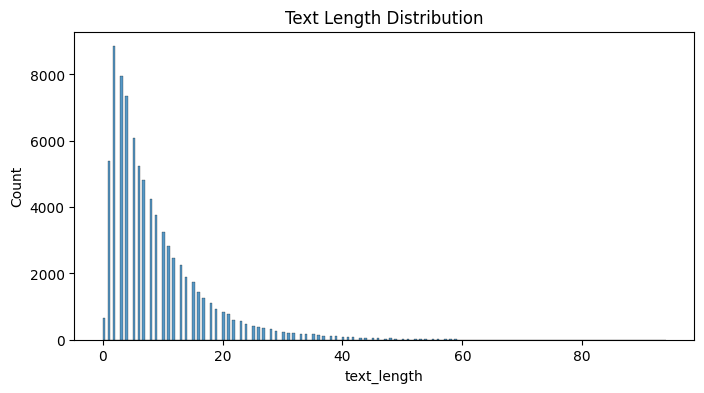

In [13]:
# Visualisasi distribusi panjang teks (jumlah kata)
plt.figure(figsize=(8, 4))
clean_df['text_length'] = clean_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(clean_df['text_length'])
plt.title('Text Length Distribution')
plt.show()

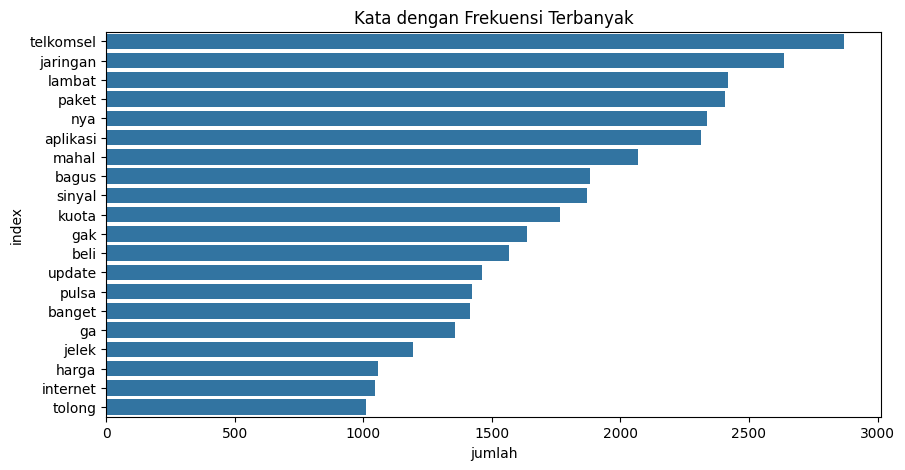

In [14]:
# Visulasisasi 20 kata yang paling sering muncul
plt.figure(figsize=(10, 5))
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Kata dengan Frekuensi Terbanyak')
plt.show()

In [15]:
import matplotlib.pyplot as plt

# Fungsi untuk membuat pie chart sebaran data menurut kelas
def pie_chart(df_data, title):
  fig, ax = plt.subplots(figsize=(5, 5))
  sizes = list(df_data.value_counts())
  labels = list(df_data.value_counts().index)
  ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=(0.05, 0.05, 0.05), textprops={'fontsize': 14})
  ax.set_title(title, fontsize=16, pad=20)
  plt.show()

# Fungsi untuk membuat word cloud
def word_cloud(df_data, title):
  # Mendata semua kata ke dalam list
  list_words = ''
  for tweet in df_data:
      for word in tweet:
          list_words += ' ' + (word)

  # Membuat objek WordCloud dengan parameter tertentu.
  wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

  # Tampilkan wordCloud
  fig, ax = plt.subplots(figsize=(6, 4))
  ax.set_title(title, fontsize=18)
  ax.grid(False)
  ax.imshow((wordcloud))
  fig.tight_layout(pad=0)
  ax.axis('off')
  plt.show()

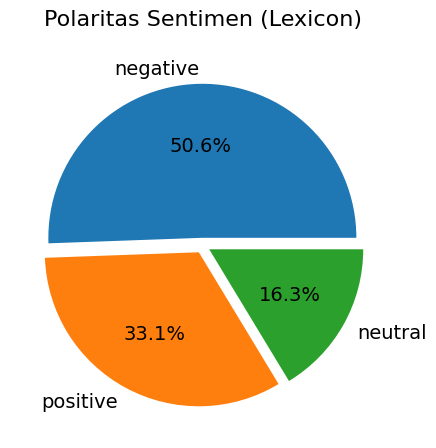

In [16]:
# Pie chart dari polaritas sentimen (lexicon)
pie_chart(df_data = clean_df['polarity_lexicon'], title = 'Polaritas Sentimen (Lexicon)')

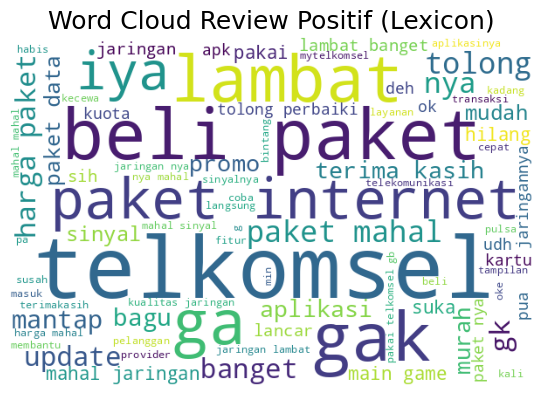

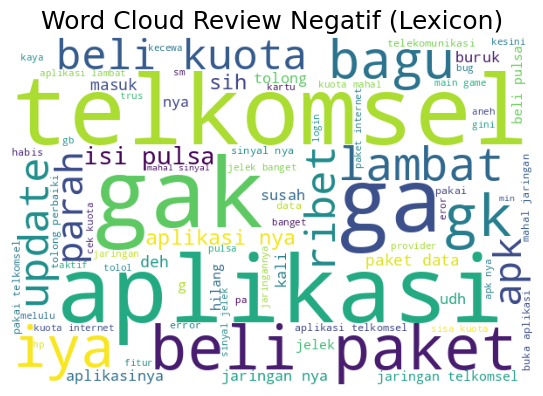

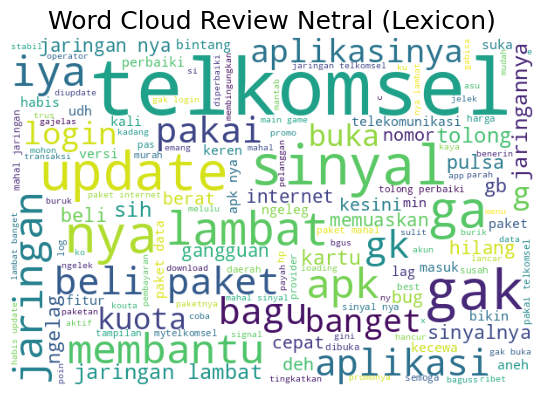

In [17]:
# WordCloud untuk positive review (lexicon)
positive_lexicon = clean_df['text_stopwords'][clean_df['polarity_lexicon'] == 'positive']
word_cloud(df_data = positive_lexicon, title = 'Word Cloud Review Positif (Lexicon)')

# WordCloud untuk negative review (lexicon)
negative_lexicon = clean_df['text_stopwords'][clean_df['polarity_lexicon'] == 'negative']
word_cloud(df_data = negative_lexicon, title = 'Word Cloud Review Negatif (Lexicon)')

# WordCloud untuk neutral review (lexicon)
neutral_lexicon = clean_df['text_stopwords'][clean_df['polarity_lexicon'] == 'neutral']
word_cloud(df_data = neutral_lexicon, title = 'Word Cloud Review Netral (Lexicon)')

# Data Split

In [18]:
# Pisahkan data menjadi fitur (review) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity_lexicon']

In [19]:
# One Hot Encoding
y = pd.get_dummies(y, dtype=int)
print(y.columns)

Index(['negative', 'neutral', 'positive'], dtype='object')


In [20]:
# Bagi data menjadi data latih dan data uji dengan perbandingan 70%:30% dan 80%:20%
X_train = {}
X_test = {}
y_train = {}
y_test = {}

X_train['6040'], X_test['6040'], y_train['6040'], y_test['6040'] = train_test_split(X, y, test_size=0.4, random_state=42)
X_train['8020'], X_test['8020'], y_train['8020'], y_test['8020'] = train_test_split(X, y, test_size=0.2, random_state=42)

# Pemodelan Machine Learning

In [21]:
model = {}
scores_train = {}
scores_test ={}

In [22]:
# Fungsi untuk plot history pelatihan model
def plot_history(history):
  plt.figure(figsize = (14, 3.5))

  # Plot akurasi training dan validation
  plt.subplot(121)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Akurasi Model')
  plt.ylabel('Akurasi')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'])

  # Plot loss training dan validation
  plt.subplot(122)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss Model')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'])
  plt.show()

In [23]:
class TFIDF():
  def __init__(self, max_features, min_df, max_df):
    self.max_features = max_features
    self.min_df = min_df
    self.max_df = max_df

  def fit_transform(self, X_train):
    self.vectorizer = TfidfVectorizer(max_features=self.max_features, min_df=self.min_df, max_df=self.max_df)
    X_train = self.vectorizer.fit_transform(X_train)
    X_train = X_train.toarray()
    return X_train

  def transform(self, X):
    X = self.vectorizer.transform(X)
    X = X.toarray()
    return X

In [24]:
class BOW():
  def __init__(self, max_features, min_df, max_df):
    self.max_features = max_features
    self.min_df = min_df
    self.max_df = max_df

  def fit_transform(self, X_train):
    self.vectorizer = CountVectorizer(max_features=self.max_features, min_df=self.min_df, max_df=self.max_df)
    X_train = self.vectorizer.fit_transform(X_train)
    X_train = X_train.toarray()
    self.scaler = MinMaxScaler()
    X_train = self.scaler.fit_transform(X_train)
    return X_train

  def transform(self, X):
    X = self.vectorizer.transform(X)
    X = X.toarray()
    X = self.scaler.transform(X)
    return X

In [25]:
class W2V():
  def __init__(self, min_count, vector_size, window, sg):
    self.min_count = min_count
    self.vector_size = vector_size
    self.window = window
    self.sg = sg

  # Memecah teks menjadi list kata
  def tokenizing(self, text):
    list_words = word_tokenize(text)
    return list_words

  def fit_transform(self, X_train):
    # Tokenisasi
    X_train = X_train.apply(self.tokenizing)
    # Latih model word2vec
    self.model = gensim.models.Word2Vec(X_train,
                                        min_count=self.min_count,
                                        vector_size=self.vector_size,
                                        window=self.window,
                                        sg=self.sg)
    # Ekstrak fitur word2vec
    X = X_train.apply(self.word_vectoring)
    # Ubah ke dalam array
    X = np.vstack(X.values)
    # Normalisasi
    self.scaler = MinMaxScaler()
    X = self.scaler.fit_transform(X)
    return X

  def word_vectoring(self, list_words):
    word_vector = np.zeros(self.vector_size)
    n_word = 0
    # Cari nilai rata-rata seluruh word vector dalam list_word
    for word in list_words:
      if word in self.model.wv:
        word_vector += self.model.wv[word]
        n_word += 1
    if n_word == 0:
      return word_vector
    else:
      word_vector /= n_word
      return word_vector

  def transform(self, X):
    # Tokenisasi
    X = X.apply(self.tokenizing)
    # Ekstraksi fitur word2vec
    X = X.apply(self.word_vectoring)
    # Ubah dalam bentuk array
    X = np.vstack(X.values)
    # Normalisasi
    X = self.scaler.transform(X)
    return X

In [26]:
class VNN():
  def __init__(self, model_path, model_name, feature):
    self.model_name = model_name
    self.model_path = model_path
    self.feature = feature
    # Mendefinisikan callback
    self.model_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5
        )
    self.model_checkpoint = ModelCheckpoint(
        self.model_path,
        monitor='val_accuracy',
        save_best_only=True,
        )

  # Fungsi untuk membuat model vanilla neural network
  def create_model(self, model_layers):
    # Mendefinisikan model
    self.model = Sequential(
        name=self.model_name,
        layers=model_layers
        )
    # Compile model
    self.model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )
    # Summary model
    self.model.summary()

  # Fungsi untuk melatih model
  def fit(self, X_train, y_train, epochs, batch_size):
    # Ekstraksi fitur
    X_train = self.feature.fit_transform(X_train)
    # Latih model
    history = self.model.fit(
      X_train, y_train,
      validation_split = 0.2,
      epochs=epochs,
      batch_size = batch_size,
      callbacks=[self.model_checkpoint, self.model_stopping]
      )
    # Plot history
    plot_history(history)

  # Fungsi untuk evaluasi model
  def evaluate(self, X_test, y_test):
    scores = {}
    y_predict = self.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    y_test = np.argmax(y_test, axis=1)
    scores['accuracy'] = accuracy_score(y_test, y_predict)
    scores['precision'] = precision_score(y_test, y_predict, average='macro', zero_division=0.0)
    scores['recall'] = recall_score(y_test, y_predict, average='macro', zero_division=0.0)
    return scores

  # Fungsi untuk prediksi model
  def predict(self, X_test):
    # Ekstraksi fitur
    X_test = self.feature.transform(X_test)
    # Load model
    self.model = load_model(self.model_path)
    # Prediksi
    predict = self.model.predict(X_test, verbose=0)
    return predict

## Model VNN TF-IDF 60:40

Model: "vnn_tfidf_6040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                24016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 24339 (95.07 KB)
Trainable params: 24339 (95.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
304/304 [==============================] - 4s 10ms/step - loss: 0.7233 - accuracy: 0.6943 - val_loss: 0.3967 - val_accuracy: 0.8872
Epoch 2/100
304/304 [==============================] - 2s 6ms/step - loss: 0.3031 - accuracy: 0.9137 - val_loss: 0.2694 - val_accuracy: 

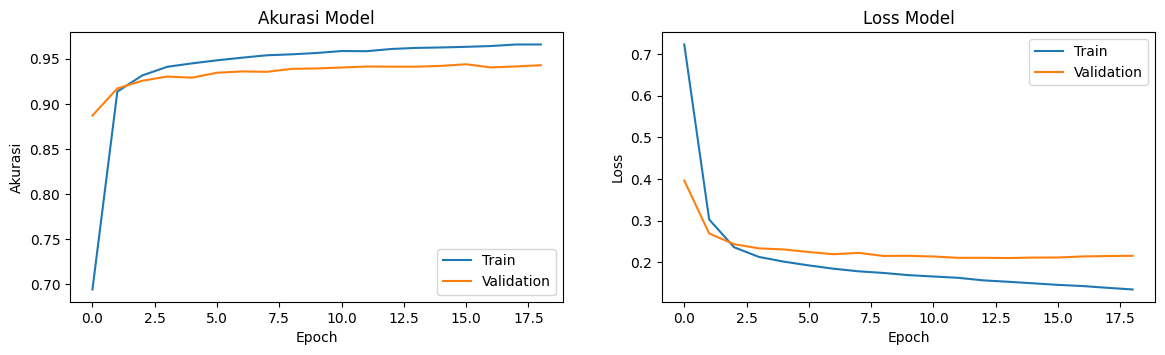

Train : {'accuracy': 0.9647320876129192, 'precision': 0.9525676884044975, 'recall': 0.9618512330913515}
Test  : {'accuracy': 0.9384977106793714, 'precision': 0.9186301929638035, 'recall': 0.9273344738246937}


In [27]:
filepath = '/content/vnn_tfidf_6040.keras'
name = 'vnn_tfidf_6040'

# Membuat model VNN dengan fitur TF-IDF
tfidf = TFIDF(max_features=1500, min_df=10, max_df=0.8)
model[name] = VNN(model_path=filepath, model_name=name, feature=tfidf)
model[name].create_model(
    model_layers = [Dense(16, activation='relu', input_shape=(1500,)),
                    Dense(16, activation='relu'),
                    Dense(3, activation='softmax')]
)

# Melatih model dengan dataset 60:40
model[name].fit(X_train['6040'], y_train['6040'], epochs=100, batch_size=128)

# Menguji model dengan dataset 60:40
scores_train[name] = model[name].evaluate(X_train['6040'], y_train['6040'])
scores_test[name] = model[name].evaluate(X_test['6040'], y_test['6040'])
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model VNN TF-IDF 80:20

Model: "vnn_tfidf_8020"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                24016     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 3)                 51        
                                                                 
Total params: 24339 (95.07 KB)
Trainable params: 24339 (95.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
405/405 [==============================] - 4s 7ms/step - loss: 0.6753 - accuracy: 0.7107 - val_loss: 0.3480 - val_accuracy: 0.9043
Epoch 2/100
405/405 [==============================] - 2s 5ms/step - loss: 0.2835 - accuracy: 0.9210 - val_loss: 0.2533 - val_accuracy: 0

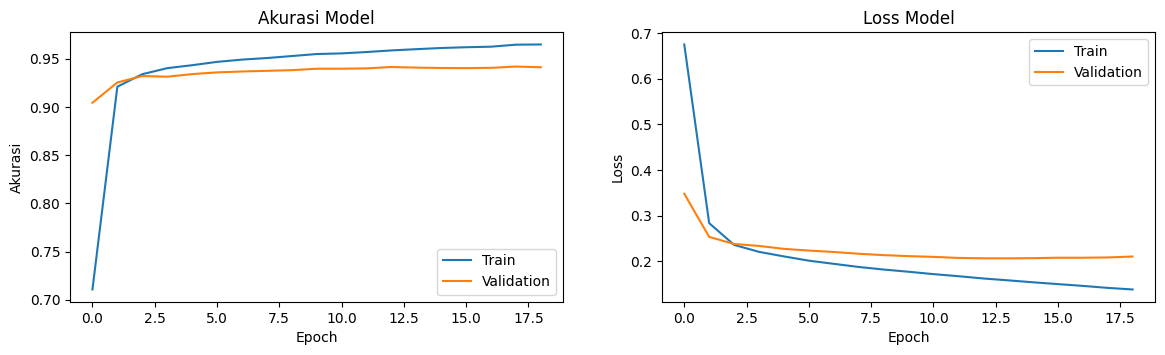

Train : {'accuracy': 0.963711174359609, 'precision': 0.9529561723002823, 'recall': 0.9580868036029536}
Test  : {'accuracy': 0.941220146021532, 'precision': 0.9243177737211612, 'recall': 0.9282442764595009}


In [28]:
filepath = '/content/vnn_tfidf_8020.keras'
name = 'vnn_tfidf_8020'

# Membuat model VNN dengan fitur TF-IDF
tfidf = TFIDF(max_features=1500, min_df=10, max_df=0.8)
model[name] = VNN(model_path=filepath, model_name=name, feature=tfidf)
model[name].create_model(
    model_layers = [Dense(16, activation='relu', input_shape=(1500,)),
                    Dense(16, activation='relu'),
                    Dense(3, activation='softmax')]
)

# Melatih model dengan dataset 80:20
model[name].fit(X_train['8020'], y_train['8020'], epochs=100, batch_size=128)

# Menguji model dengan dataset 80:20
scores_train[name] = model[name].evaluate(X_train['8020'], y_train['8020'])
scores_test[name] = model[name].evaluate(X_test['8020'], y_test['8020'])
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model VNN BoW 60:40

Model: "vnn_bow_6040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                24016     
                                                                 
 dense_7 (Dense)             (None, 16)                272       
                                                                 
 dense_8 (Dense)             (None, 3)                 51        
                                                                 
Total params: 24339 (95.07 KB)
Trainable params: 24339 (95.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
304/304 [==============================] - 4s 8ms/step - loss: 0.8417 - accuracy: 0.6173 - val_loss: 0.5632 - val_accuracy: 0.7725
Epoch 2/100
304/304 [==============================] - 2s 5ms/step - loss: 0.4241 - accuracy: 0.8817 - val_loss: 0.3525 - val_accuracy: 0.9

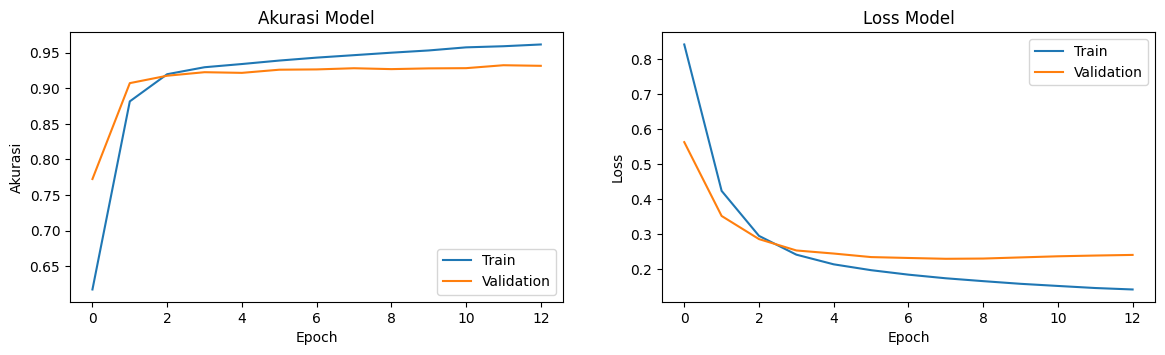

Train : {'accuracy': 0.9594109639896052, 'precision': 0.9491996364356706, 'recall': 0.9458338447731801}
Test  : {'accuracy': 0.9262776884049004, 'precision': 0.908276149646945, 'recall': 0.9030648362646114}


In [29]:
filepath = '/content/vnn_bow_6040.keras'
name = 'vnn_bow_6040'

# Membuat model VNN dengan fitur BoW
bow = BOW(max_features=1500, min_df=10, max_df=0.8)
model[name] = VNN(model_path=filepath, model_name=name, feature=bow)
model[name].create_model(
    model_layers = [Dense(16, activation='relu', input_shape=(1500,)),
                    Dense(16, activation='relu'),
                    Dense(3, activation='softmax')]
)

# Melatih model dengan dataset 6040
model[name].fit(X_train['6040'], y_train['6040'], epochs=100, batch_size=128)

# Menguji model dengan dataset 6040
scores_train[name] = model[name].evaluate(X_train['6040'], y_train['6040'])
scores_test[name] = model[name].evaluate(X_test['6040'], y_test['6040'])
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model VNN BoW 80:20

Model: "vnn_bow_8020"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 16)                24016     
                                                                 
 dense_10 (Dense)            (None, 16)                272       
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 24339 (95.07 KB)
Trainable params: 24339 (95.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
405/405 [==============================] - 4s 7ms/step - loss: 0.7061 - accuracy: 0.7130 - val_loss: 0.4241 - val_accuracy: 0.8898
Epoch 2/100
405/405 [==============================] - 2s 5ms/step - loss: 0.3485 - accuracy: 0.9094 - val_loss: 0.3137 - val_accuracy: 0.9

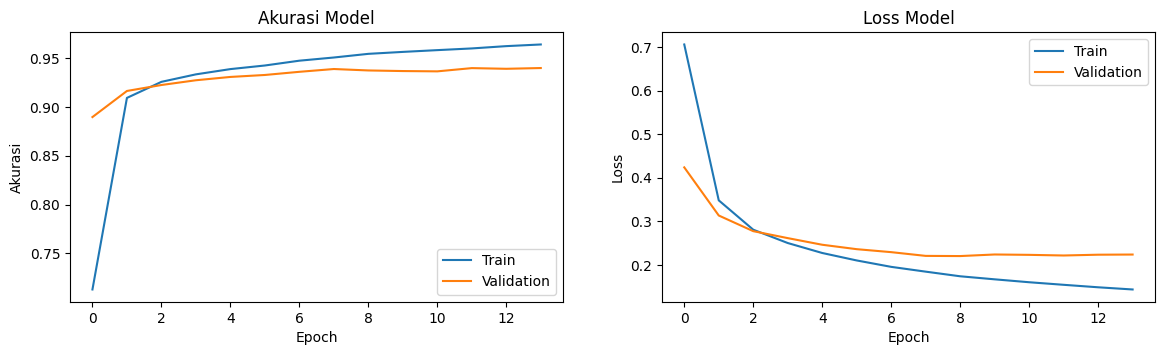

Train : {'accuracy': 0.9641442890731345, 'precision': 0.9499378317627966, 'recall': 0.9602606261392985}
Test  : {'accuracy': 0.9391783195149115, 'precision': 0.9181476089211541, 'recall': 0.929238651939292}


In [30]:
filepath = '/content/vnn_bow_8020.keras'
name = 'vnn_bow_8020'

# Membuat model VNN dengan fitur BoW
bow = BOW(max_features=1500, min_df=10, max_df=0.8)
model[name] = VNN(model_path=filepath, model_name=name, feature=bow)
model[name].create_model(
    model_layers = [Dense(16, activation='relu', input_shape=(1500,)),
                    Dense(16, activation='relu'),
                    Dense(3, activation='softmax')]
)

# Melatih model dengan dataset 80:20
model[name].fit(X_train['8020'], y_train['8020'], epochs=100, batch_size=128)

# Menguji model dengan dataset 80:20
scores_train[name] = model[name].evaluate(X_train['8020'], y_train['8020'])
scores_test[name] = model[name].evaluate(X_test['8020'], y_test['8020'])
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

# Pemodelan Deep Learning

In [31]:
class DNN():
  def __init__(self, model_path, model_name, num_vocab, len_sequence):
    self.model_name = model_name
    self.model_path = model_path
    self.num_vocab = num_vocab
    self.len_sequence = len_sequence
    # Mendefinisikan callback
    self.model_stopping = EarlyStopping(
        monitor='val_loss',
        patience=5
        )
    self.model_checkpoint = ModelCheckpoint(
        self.model_path,
        monitor='val_accuracy',
        save_best_only=True,
        )

  # Fungsi untuk membuat model recurrent neural network
  def create_model(self, model_layers):
    # Mendefinisikan model
    self.model = Sequential(
        name=self.model_name,
        layers=model_layers
        )
    # Compile model
    self.model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
        )
    # Summary model
    self.model.summary()

  # Fungsi untuk melatih model
  def fit(self, X_train, y_train, epochs, batch_size):

    # Preprocessing
    self.tokenizer = Tokenizer(num_words = self.num_vocab)
    self.tokenizer.fit_on_texts(X_train)
    X_train = self.tokenizer.texts_to_sequences(X_train)
    X_train = pad_sequences(X_train, maxlen=self.len_sequence)

    # Latih model
    history = self.model.fit(
      X_train, y_train,
      validation_split=0.2,
      epochs=epochs,
      batch_size=batch_size,
      callbacks=[self.model_checkpoint, self.model_stopping]
      )

    # Plot history
    plot_history(history)

  # Fungsi untuk evaluasi model
  def evaluate(self, X_test, y_test):
    scores = {}
    y_predict = self.predict(X_test)
    y_predict = np.argmax(y_predict, axis=1)
    y_test = np.argmax(y_test, axis=1)
    scores['accuracy'] = accuracy_score(y_test, y_predict)
    scores['precision'] = precision_score(y_test, y_predict, average='macro', zero_division=0.0)
    scores['recall'] = recall_score(y_test, y_predict, average='macro', zero_division=0.0)
    return scores

  # Fungsi untuk prediksi model
  def predict(self, X_test):
    # Preprocessing
    X_test = self.tokenizer.texts_to_sequences(X_test)
    X_test = pad_sequences(X_test, maxlen=self.len_sequence)
    # Load model
    self.model = load_model(self.model_path)
    # Prediksi
    predict = self.model.predict(X_test, verbose=0)
    return predict

## Model VNN 60:40

Model: "vnn_dl_6040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           80000     
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 16)                25616     
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_13 (Dense)            (None, 3)                 51        
                                                                 
Total params: 105667 (412.76 KB)
Trainable params: 105667 (412.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
304/

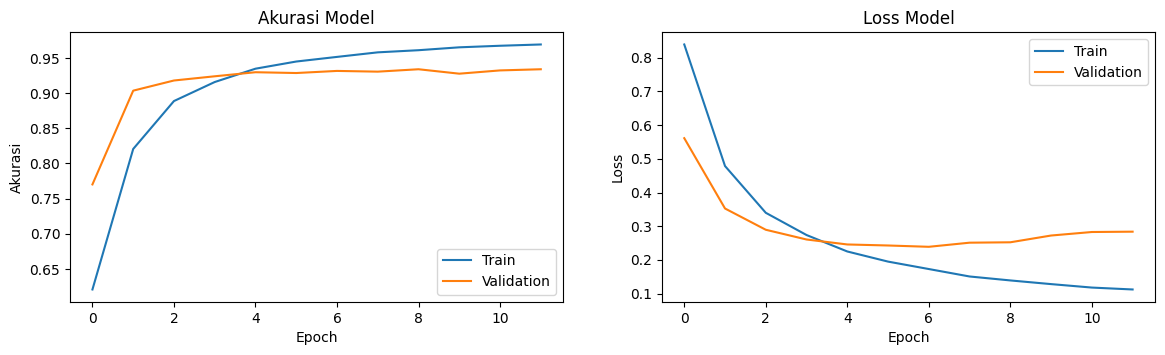

Train : {'accuracy': 0.9746112279833354, 'precision': 0.9671519812532493, 'recall': 0.9636501536857209}
Test  : {'accuracy': 0.9287216928597946, 'precision': 0.9078331178342167, 'recall': 0.9021775452180022}


In [32]:
filepath = '/content/vnn_dl_6040.keras'
name = 'vnn_dl_6040'

# Membuat model VNN
num_vocab = 5000
len_sequence = 100
dim_embedding = 16
model[name] = DNN(model_path=filepath, model_name=name, num_vocab=num_vocab, len_sequence=len_sequence)
model[name].create_model(
    model_layers = [Embedding(num_vocab, dim_embedding, input_length=len_sequence),
                    Flatten(),
                    Dense(16, activation = 'relu'),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')]
)

# Melatih model dengan dataset 60:40
model[name].fit(X_train['6040'].values, y_train['6040'].values, epochs=20, batch_size=128)

# Menguji model dengan dataset 60:40
scores_train[name] = model[name].evaluate(X_train['6040'].values, y_train['6040'].values)
scores_test[name] = model[name].evaluate(X_test['6040'].values, y_test['6040'].values)
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model VNN 80:20

Model: "vnn_dl_8020"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           80000     
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_14 (Dense)            (None, 16)                25616     
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                 51        
                                                                 
Total params: 105667 (412.76 KB)
Trainable params: 105667 (412.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
405/

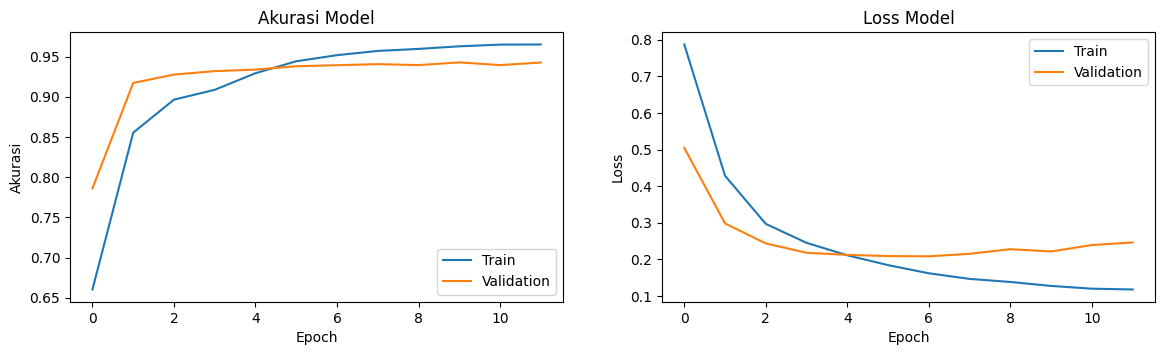

Train : {'accuracy': 0.9767974260611311, 'precision': 0.9691700376048362, 'recall': 0.9669496084859556}
Test  : {'accuracy': 0.9395495606979334, 'precision': 0.9208373275274718, 'recall': 0.918915968156136}


In [33]:
filepath = '/content/vnn_dl_8020.keras'
name = 'vnn_dl_8020'

# Membuat model VNN
num_vocab = 5000
len_sequence = 100
dim_embedding = 16
model[name] = DNN(model_path=filepath, model_name=name, num_vocab=num_vocab, len_sequence=len_sequence)
model[name].create_model(
    model_layers = [Embedding(num_vocab, dim_embedding, input_length=len_sequence),
                    Flatten(),
                    Dense(16, activation = 'relu'),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')]
)

# Melatih model dengan dataset 80:20
model[name].fit(X_train['8020'].values, y_train['8020'].values, epochs=20, batch_size=128)

# Menguji model dengan dataset 80:20
scores_train[name] = model[name].evaluate(X_train['8020'].values, y_train['8020'].values)
scores_test[name] = model[name].evaluate(X_test['8020'].values, y_test['8020'].values)
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model RNN 60:40

Model: "rnn_dl_6040"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           80000     
                                                                 
 lstm (LSTM)                 (None, 16)                2112      
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 3)                 51        
                                                                 
Total params: 82435 (322.01 KB)
Trainable params: 82435 (322.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
304/30

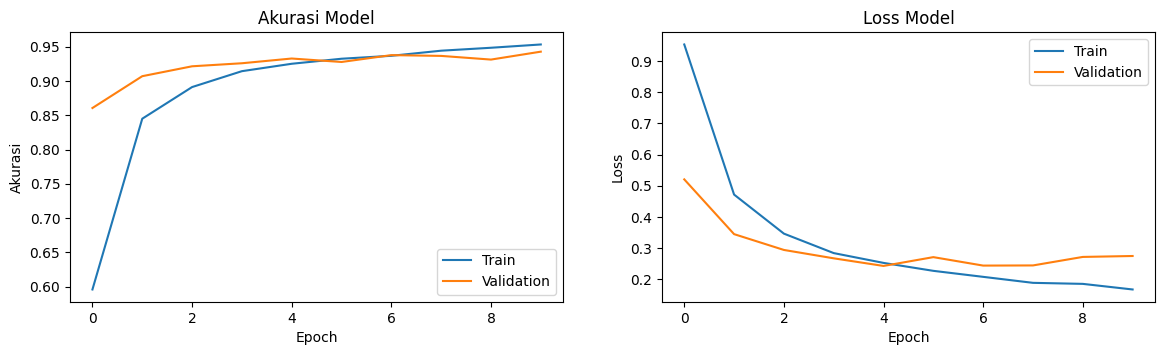

Train : {'accuracy': 0.9712494328259704, 'precision': 0.9682791200156098, 'recall': 0.9539216036743435}
Test  : {'accuracy': 0.9388070783318896, 'precision': 0.9258219989574589, 'recall': 0.9121808279424407}


In [34]:
filepath = '/content/rnn_dl_6040.keras'
name = 'rnn_dl_6040'

# Membuat model RNN
num_vocab = 5000
len_sequence = 100
dim_embedding = 16
model[name] = DNN(model_path=filepath, model_name=name, num_vocab=num_vocab, len_sequence=len_sequence)
model[name].create_model(
    model_layers = [Embedding(num_vocab, dim_embedding, input_length=len_sequence),
                    LSTM(units = 16, kernel_regularizer='l2'),
                    Dense(16, activation = 'relu'),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')]
)

# Melatih model dengan dataset 60:40
model[name].fit(X_train['6040'].values, y_train['6040'].values, epochs=20, batch_size=128)

# Menguji model dengan dataset 60:40
scores_train[name] = model[name].evaluate(X_train['6040'].values, y_train['6040'].values)
scores_test[name] = model[name].evaluate(X_test['6040'].values, y_test['6040'].values)
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

## Model RNN 80:20

Model: "rnn_dl_8020"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           80000     
                                                                 
 lstm_1 (LSTM)               (None, 16)                2112      
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 3)                 51        
                                                                 
Total params: 82435 (322.01 KB)
Trainable params: 82435 (322.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
405/40

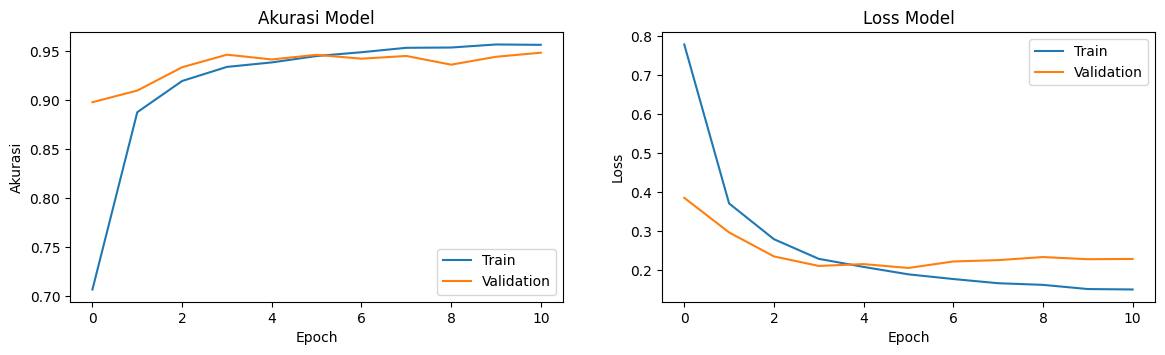

Train : {'accuracy': 0.9747865363197624, 'precision': 0.9668571646500889, 'recall': 0.963809563773678}
Test  : {'accuracy': 0.9500061873530503, 'precision': 0.9353610030839951, 'recall': 0.9323189028380988}


In [35]:
filepath = '/content/rnn_dl_8020.keras'
name = 'rnn_dl_8020'

# Membuat model RNN
num_vocab = 5000
len_sequence = 100
dim_embedding = 16
model[name] = DNN(model_path=filepath, model_name=name, num_vocab=num_vocab, len_sequence=len_sequence)
model[name].create_model(
    model_layers = [Embedding(num_vocab, dim_embedding, input_length=len_sequence),
                    LSTM(units = 16, kernel_regularizer='l2'),
                    Dense(16, activation = 'relu'),
                    Dropout(0.5),
                    Dense(3, activation = 'softmax')]
)

# Melatih model dengan dataset 80:20
model[name].fit(X_train['8020'].values, y_train['8020'].values, epochs=20, batch_size=128)

# Menguji model dengan dataset 80:20
scores_train[name] = model[name].evaluate(X_train['8020'].values, y_train['8020'].values)
scores_test[name] = model[name].evaluate(X_test['8020'].values, y_test['8020'].values)
print(f'Train : {scores_train[name]}')
print(f'Test  : {scores_test[name]}')

# Perbandingan Model

In [36]:
train_df = pd.DataFrame(scores_train)
test_df = pd.DataFrame(scores_test)
train_df.index = train_df.index + '_train'
test_df.index = test_df.index + '_test'
results_df = pd.concat([train_df, test_df], axis=0, ignore_index=False)
results_df = results_df.transpose()
results_df = results_df.sort_values('accuracy_test', ascending=False)
results_df

,accuracy_train,precision_train,recall_train,accuracy_test,precision_test,recall_test
rnn_dl_8020,0.974787,0.966857,0.963810,0.950006,0.935361,0.932319
vnn_tfidf_8020,0.963711,0.952956,0.958087,0.941220,0.924318,0.928244
vnn_dl_8020,0.976797,0.969170,0.966950,0.939550,0.920837,0.918916
vnn_bow_8020,0.964144,0.949938,0.960261,0.939178,0.918148,0.929239
rnn_dl_6040,0.971249,0.968279,0.953922,0.938807,0.925822,0.912181
vnn_tfidf_6040,0.964732,0.952568,0.961851,0.938498,0.918630,0.927334
vnn_dl_6040,0.974611,0.967152,0.963650,0.928722,0.907833,0.902178
vnn_bow_6040,0.959411,0.949200,0.945834,0.926278,0.908276,0.903065


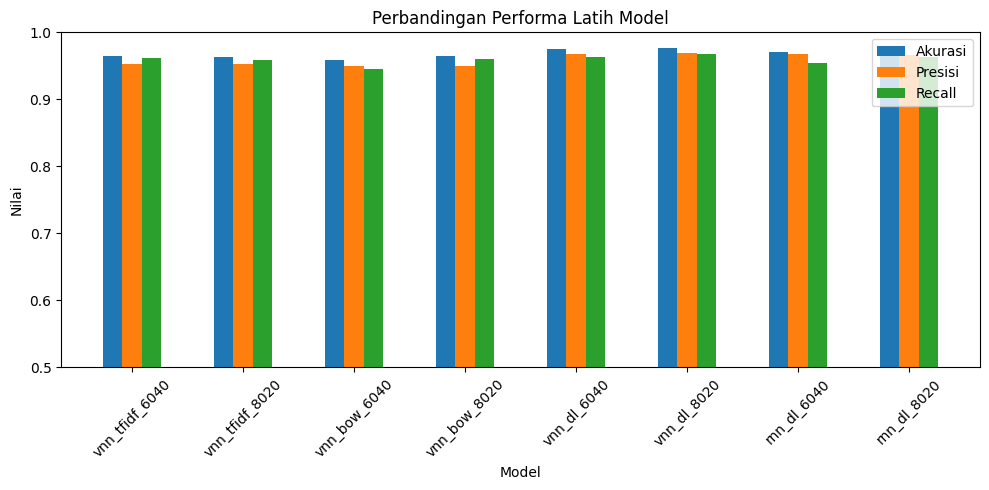

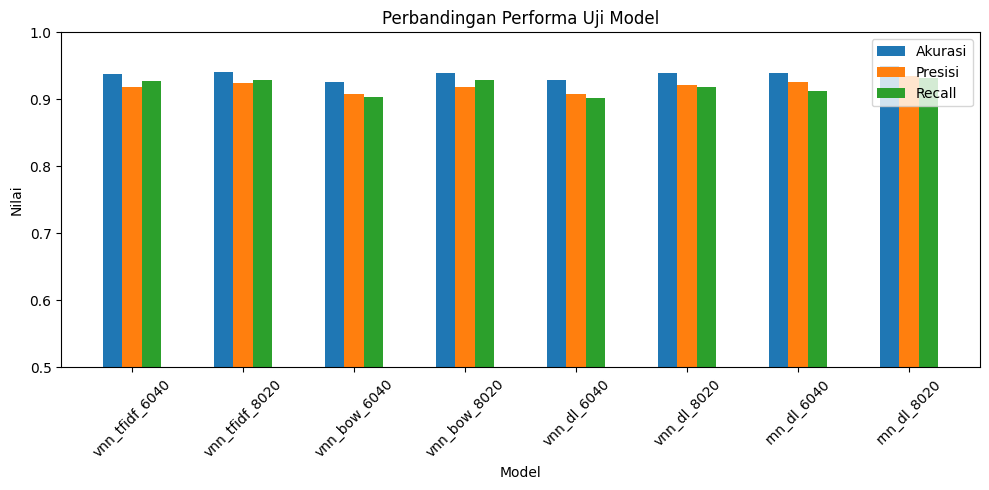

In [37]:
# Plot perbandingan performa model
def plot_all(scores, title):
  models_name = model.keys()
  x = np.arange(len(models_name))
  acc, pre, rec = [], [], []
  width = 0.35

  for model_name, score in scores.items():
    acc.append(score['accuracy'])
    pre.append(score['precision'])
    rec.append(score['recall'])

  plt.rcParams['figure.figsize'] = [10, 5]
  fig, ax = plt.subplots()
  plt.bar(x - width/2, acc, width/2, label='Akurasi')
  plt.bar(x, pre, width/2, label='Presisi')
  plt.bar(x + width/2, rec, width/2, label='Recall')
  plt.xticks(x, models_name, rotation=45)
  plt.title(title)
  plt.ylabel('Nilai')
  plt.xlabel('Model')
  plt.ylim(0.5, 1)
  plt.legend()
  plt.tight_layout()
  plt.show()

# Plot seluruh hasil pengujian
plot_all(scores=scores_train, title='Perbandingan Performa Latih Model')
plot_all(scores=scores_test, title='Perbandingan Performa Uji Model')

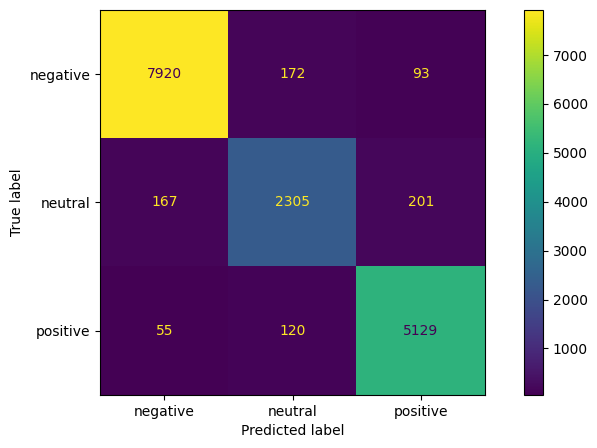

In [38]:
# Prediksi model terbaik pada data test
y_predict = model['rnn_dl_8020'].predict(X_test['8020'])
y_predict = np.argmax(y_predict, axis=1)
y_true = np.argmax(y_test['8020'], axis=1)

# Confusion matrix model terbaik
conf_mat = confusion_matrix(y_true, y_predict)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=y_test['8020'].columns)
displ.plot()

# Inference

In [39]:
def classify_text(text):
  # Melakukan preprocessing pada kalimat baru
  cleaned_text = cleaningText(text)
  casefolded_text = casefoldingText(cleaned_text)
  slangfixed_text = fix_slangwords(casefolded_text)
  tokenized_text = tokenizingText(slangfixed_text)
  filtered_text = filteringText(tokenized_text)
  final_text = toSentence(filtered_text)

  # Memperoleh prediksi sentimen kalimat baru
  classes = ['negative', 'neutral', 'positive']
  predicted = model['rnn_dl_8020'].predict([final_text])
  predicted = np.argmax(predicted)
  return classes[predicted]

In [40]:
# Input kalimat baru dari pengguna
text = input("Masukkan kalimat baru: ")
# Prediksi menggunakan model
predicted_sentimen = classify_text(text)
print(f"Sentimen kalimat baru adalah {predicted_sentimen}.")

Masukkan kalimat baru: jaringan telkomsel jelek
Sentimen kalimat baru adalah negative.


In [41]:
# Input kalimat baru dari pengguna
text = input("Masukkan kalimat baru: ")
# Prediksi menggunakan model
predicted_sentimen = classify_text(text)
print(f"Sentimen kalimat baru adalah {predicted_sentimen}.")

Masukkan kalimat baru: telkomsel mantap
Sentimen kalimat baru adalah positive.


In [50]:
# Input kalimat baru dari pengguna
text = input("Masukkan kalimat baru: ")
# Prediksi menggunakan model
predicted_sentimen = classify_text(text)
print(f"Sentimen kalimat baru adalah {predicted_sentimen}.")

Masukkan kalimat baru: aplikasinya membantu tetapi agak berat dan ngelag
Sentimen kalimat baru adalah neutral.
